# Pandas与绘图基础知识点

作者：杨岱川

时间：2019年9月

最新编辑：2020年5月

github：https://github.com/DrDavidS/basic_Machine_Learning

开源协议：[MIT](https://github.com/DrDavidS/basic_Machine_Learning/blob/master/LICENSE)

## 导入pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Pandas的两种主要数据结构

### Series

Series 是一种带轴标签的的一维数组，可以保存任何数据类型。

In [2]:
nay = np.random.rand(5) 
ser = pd.Series(nay)
print(nay)

[0.17811986 0.67252265 0.7711482  0.17415712 0.37557345]


In [3]:
print(ser)

0    0.178120
1    0.672523
2    0.771148
3    0.174157
4    0.375573
dtype: float64


In [4]:
print(type(nay))

<class 'numpy.ndarray'>


In [5]:
print(type(ser))

<class 'pandas.core.series.Series'>


### Dataframe

DataFrame是一种数据框结构，有点类似于平时使用的Excel表格。

以著名的 iris 数据集为例，我们将利用这个数据集来讲解DataFrame相关用法。

参考链接：[This notebook demos Python data visualizations on the Iris dataset](https://www.kaggle.com/benhamner/python-data-visualizations)

>Iris数据集是常用的分类实验数据集，由Fisher, 1936收集整理。Iris也称鸢尾花卉数据集，是一类多重变量分析的数据集。数据集包含150个数据样本，分为3类，每类50个数据，每个数据包含4个属性。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。

### 读取文件为Dataframe

如何读取txt文件或者csv等文件为 Dataframe ？

一般情况下我们使用 Pandas 自带的 read_csv() 方法。如果是 xlsx 文件，则使用 read_excel() 方法。

Pandas 可以读取非常多种类的文件，具体内容可以参考[IO工具](https://www.pypandas.cn/docs/user_guide/io.html#csv-文本文件)。



In [6]:
iris = pd.read_csv("Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### 简单查看数据

前十行：

In [7]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


查看每个种类有多少数量：

In [8]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### 查看种类分布

使用matplotlib查看种类分布,首先我们将三种鸢尾花拆分成三个Dataframe：

DataFrame 中，筛选数据一般有 iloc 和 loc 方法，两种方法稍有区别。iloc主要使用索引筛选，loc接受字符串输入筛选。

以下采用两种筛选方法。注意第二种方法在修改数据的时候，有可能导致数据不安全（例如覆盖掉之前的Dataframe）从而弹出警告。

In [10]:
iris_virginica = iris.loc[iris['Species'] == 'Iris-virginica']
iris_versicolor = iris.loc[iris['Species'] == 'Iris-versicolor']
iris_setosa = iris.loc[iris['Species'] == 'Iris-setosa']

In [11]:
iris_virginica

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
106,107,4.9,2.5,4.5,1.7,Iris-virginica
107,108,7.3,2.9,6.3,1.8,Iris-virginica
108,109,6.7,2.5,5.8,1.8,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica


In [12]:
iris_virginica = iris[iris['Species'] == 'Iris-virginica']
iris_versicolor = iris[iris['Species'] == 'Iris-versicolor']
iris_setosa = iris[iris['Species'] == 'Iris-setosa']

In [13]:
iris_virginica

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
106,107,4.9,2.5,4.5,1.7,Iris-virginica
107,108,7.3,2.9,6.3,1.8,Iris-virginica
108,109,6.7,2.5,5.8,1.8,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica


然后以花萼长度为$ x $轴，以花萼宽度为$ y $轴，画出散点图，用不同的颜色标记。

matplotlib中，使用scatter（散点图）来绘制图形，我们使用了三次scatter方法来绘制三个不同种类的鸢尾花，最后绘制的图形会将三次内容叠加显示。

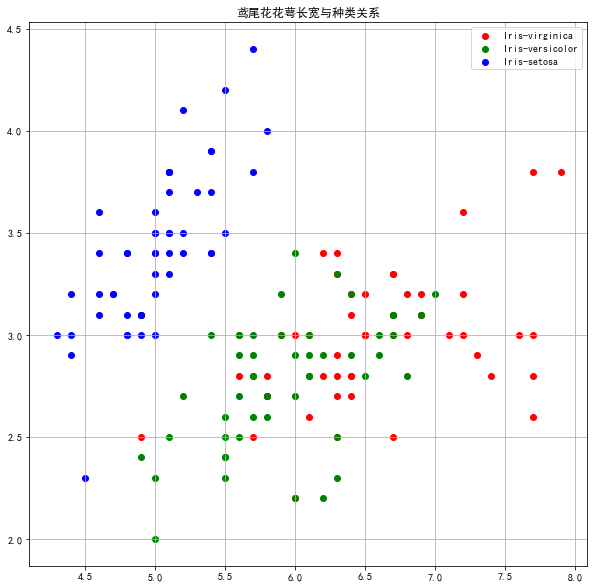

In [14]:
# 画布大小
plt.figure(figsize=(10,10))

# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花花萼长宽与种类关系')

# 数据散点图
plt.scatter(iris_virginica['SepalLengthCm'], iris_virginica['SepalWidthCm'], c='r', label='Iris-virginica')
plt.scatter(iris_versicolor['SepalLengthCm'], iris_versicolor['SepalWidthCm'], c='g', label='Iris-versicolor')
plt.scatter(iris_setosa['SepalLengthCm'], iris_setosa['SepalWidthCm'], c='b', label='Iris-setosa')

# 其他部分
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格
plt.show()  # 显示图片

同时我们再试试seaborn，这也是一个热门的Python绘图工具。在本节中，seaborn的用法不是重点，希望学习seaborn的同学可以参考官方文档和教程。

In [15]:
import seaborn as sns

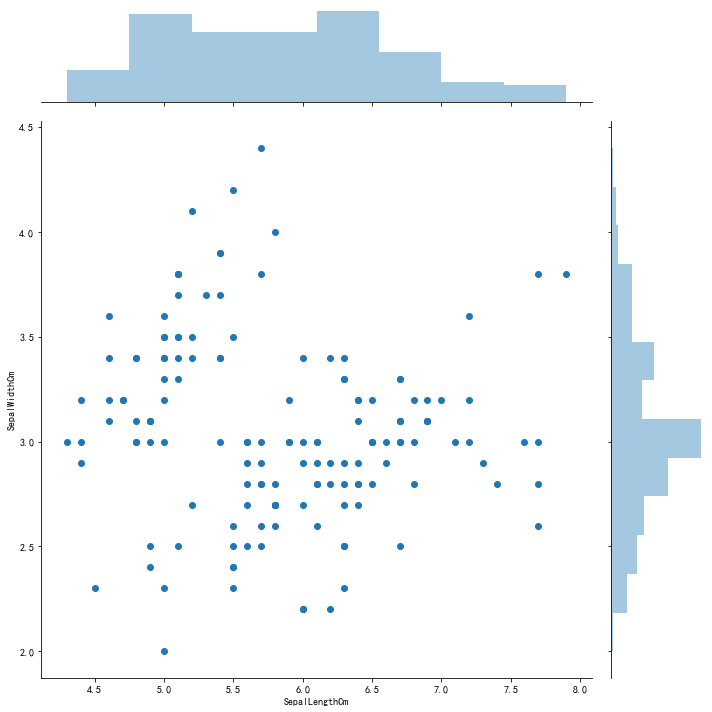

In [16]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, height=10)
plt.show()

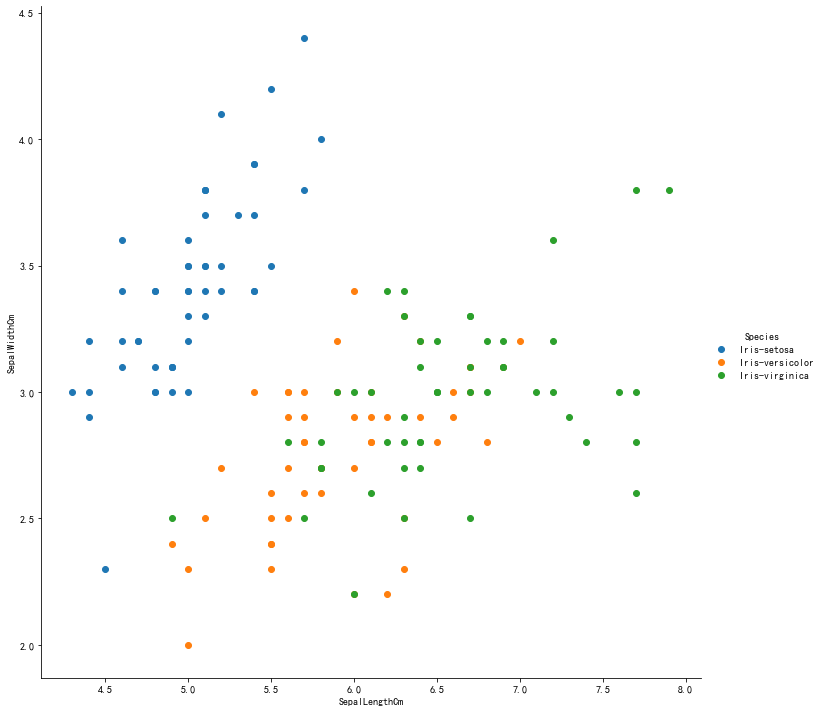

In [17]:
sns.FacetGrid(iris, hue="Species", height=10) \
            .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
            .add_legend()  # 图例
plt.show()